Experimento Super


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import signal
import sklearn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE
%matplotlib inline
palette = sns.color_palette("bright", 10)

In [ ]:
df=pd.read_csv("dataframe.csv")
df

,Unnamed: 0,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate,segment_indices,time,ECG,GSR1,HR,marker,RESP,stress,EMG,GSR2,marker,RESP
0,0,100.204225,598.777145,158.450721,123.06782636487213,231.500413,0.803030,0.803030,196.078431,163.479697,142.602496,73238.732937,1.146401,0.395229,"(0, 612)",19.645164,-0.061711,1.646072,71.991274,0.000000,12.344410,0,NaN,NaN,NaN,NaN
1,1,76.500000,784.313725,175.377881,0.0,196.078431,1.000000,1.000000,196.078431,0.000000,0.000000,0.000000,NaN,0.255102,"(612, 1224)",59.000000,-0.655916,1.552779,64.534682,2.249066,12.572282,0,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(1224, 1836)",98.354836,-0.271397,1.539436,73.220705,14.553066,12.372616,0,NaN,NaN,NaN,NaN
3,3,108.547297,552.754435,164.120056,151.89921691491884,225.076095,0.611765,0.611765,196.078431,159.119394,169.640381,84801.245203,0.937981,0.517099,"(1836, 2448)",137.709680,-0.004925,1.438843,70.006134,14.613492,12.213843,0,NaN,NaN,NaN,NaN
4,4,102.822581,583.529412,163.513894,142.4606483171773,248.628931,0.754902,0.754902,196.078431,175.723105,143.107671,79002.648945,1.227908,0.342879,"(2448, 3060)",177.032258,0.000163,1.497253,69.899471,19.723284,12.163507,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,154,87.466667,685.975610,203.188506,190.52839077380514,307.008709,0.688312,0.688312,243.902439,213.311399,171.429321,114881.220387,1.244311,0.471239,"(75767, 76259)",4882.193546,0.000912,1.257591,70.645405,13.779836,11.676920,0,NaN,NaN,NaN,NaN
2441,155,82.298182,729.056204,201.815741,180.2971942964523,327.975708,0.780822,0.780822,243.902439,231.480228,163.203137,118684.028004,1.418356,0.388013,"(76259, 76751)",4913.806454,0.004528,1.241389,72.914992,13.638896,11.769873,0,NaN,NaN,NaN,NaN
2442,156,71.750000,836.236934,120.700405,116.86766432925735,195.557006,0.642857,0.642857,0.000000,133.249639,102.328747,42836.459495,1.302172,0.213712,"(76751, 77243)",4945.387098,0.002516,1.225859,69.274739,13.516184,11.780359,0,NaN,NaN,NaN,NaN
2443,157,73.135135,820.399113,117.328218,114.97671238805654,199.145508,0.666667,0.666667,0.000000,81.300813,81.300813,20765.368852,1.000000,0.499057,"(77243, 77735)",4977.000000,0.003227,1.210892,65.720053,13.440510,11.771947,0,NaN,NaN,NaN,NaN


In [ ]:
df['ECG']


0      -0.061711
1      -0.655916
2      -0.271397
3      -0.004925
4       0.000163
          ...   
2440    0.000912
2441    0.004528
2442    0.002516
2443    0.003227
2444    0.001035
Name: ECG, Length: 2445, dtype: float64

In [ ]:
selected_x_columns = ['bpm','ibi','sdnn','sdsd', 'rmssd', 'pnn20','pnn50','hr_mad','sd1','sd2','s','sd1/sd2','breathingrate','ECG','HR',]

In [ ]:
K = df[selected_x_columns +['stress']]
a = K.replace([np.inf, -np.inf], np.nan)
a.mean()

bpm              7.846122e+01
ibi              8.055528e+02
sdnn             1.603791e+02
rmssd            2.375325e+02
pnn20            6.428547e-01
pnn50            6.428547e-01
hr_mad           1.258452e+02
sd1              1.567205e+02
sd2              1.422425e+02
s                7.694332e+04
sd1/sd2          6.574198e+11
breathingrate    9.074360e-01
ECG             -4.114936e-02
HR               7.820151e+01
stress           6.817996e-01
dtype: float64

In [ ]:
A = a.dropna()
A.mean()

bpm              7.908760e+01
ibi              7.927844e+02
sdnn             1.696254e+02
rmssd            2.493578e+02
pnn20            6.563852e-01
pnn50            6.563852e-01
hr_mad           1.424506e+02
sd1              1.707999e+02
sd2              1.531774e+02
s                8.480824e+04
sd1/sd2          7.383167e+11
breathingrate    3.112728e-01
ECG             -5.325765e-02
HR               7.879513e+01
stress           7.544331e-01
dtype: float64

In [ ]:
A.to_csv('db.csv',index=True)

In [ ]:
z = pd.read_csv("db.csv")
z['stress'].sum()

1404

In [ ]:
X = z[selected_x_columns]
Y = z['stress']
X

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate,ECG,HR
0,100.204225,598.777145,158.450721,123.067826,231.500413,0.803030,0.803030,196.078431,163.479697,142.602496,73238.732937,1.146401,0.395229,-0.061711,71.991274
1,108.547297,552.754435,164.120056,151.899217,225.076095,0.611765,0.611765,196.078431,159.119394,169.640381,84801.245203,0.937981,0.517099,-0.004925,70.006134
2,102.822581,583.529412,163.513894,142.460648,248.628931,0.754902,0.754902,196.078431,175.723105,143.107671,79002.648945,1.227908,0.342879,0.000163,69.899471
3,106.180328,565.076424,167.997165,149.942330,237.780025,0.676471,0.676471,196.078431,165.923457,153.642762,80088.427594,1.079930,0.390320,-0.005618,68.789952
4,83.785714,716.112532,136.934172,124.010889,232.003129,0.800000,0.800000,196.078431,148.683832,116.827209,54570.460591,1.272682,0.242954,0.004269,68.114567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856,87.466667,685.975610,203.188506,190.528391,307.008709,0.688312,0.688312,243.902439,213.311399,171.429321,114881.220387,1.244311,0.471239,0.000912,70.645405
1857,82.298182,729.056204,201.815741,180.297194,327.975708,0.780822,0.780822,243.902439,231.480228,163.203137,118684.028004,1.418356,0.388013,0.004528,72.914992
1858,71.750000,836.236934,120.700405,116.867664,195.557006,0.642857,0.642857,0.000000,133.249639,102.328747,42836.459495,1.302172,0.213712,0.002516,69.274739
1859,73.135135,820.399113,117.328218,114.976712,199.145508,0.666667,0.666667,0.000000,81.300813,81.300813,20765.368852,1.000000,0.499057,0.003227,65.720053


#Utilizando train test-split para fazer estudo sobre os melhores Hiper parametros.
Modifiquei os valores de teste size para simular os folds, eu não fiz isso utilizando os folds normais pq as bases de treino e teste e validação ficavam desbalanceadas quanto testei.

In [ ]:
X_train, X_vt, y_train, y_vt = train_test_split(X, Y, test_size=0.4,random_state=30)
X_val, X_test, y_val, y_test = train_test_split(X_vt,y_vt, test_size = 0.5,random_state=30)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(1116, 15) (1116,)
(372, 15) (372,)
(373, 15) (373,)


Normalização


In [ ]:
X_train_nor = X_train/255
X_val_nor = X_val/255
X_test_nor = X_test/255

Standard 


In [ ]:
std = StandardScaler()

std.fit(X_train)
X_train_std = std.transform(X_train)
X_val_std = std.transform(X_val)
x_test_std = std.transform(X_test) 

PCA 

(10, 15)
(10, 15)


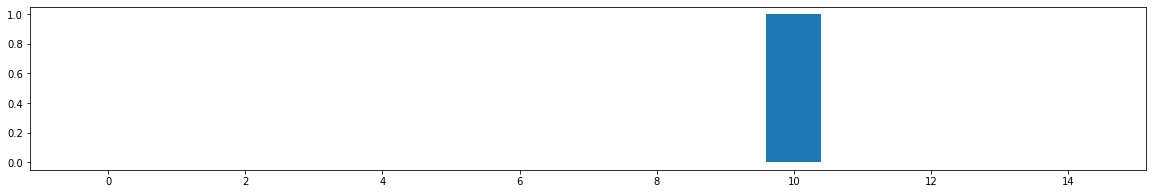

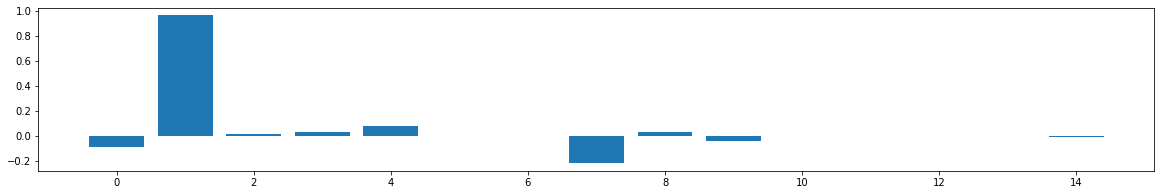

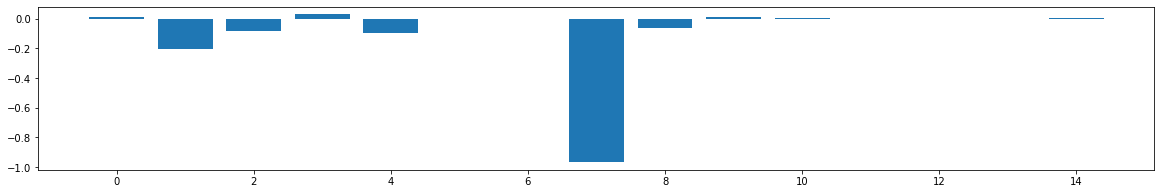

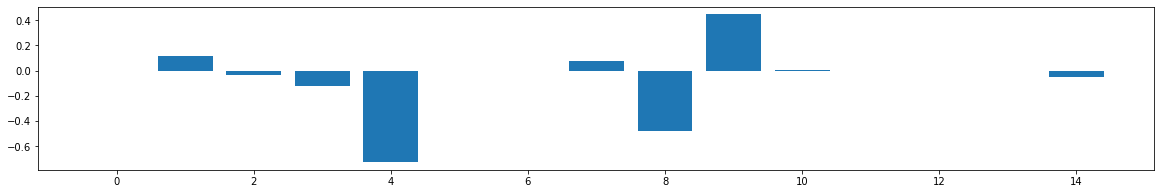

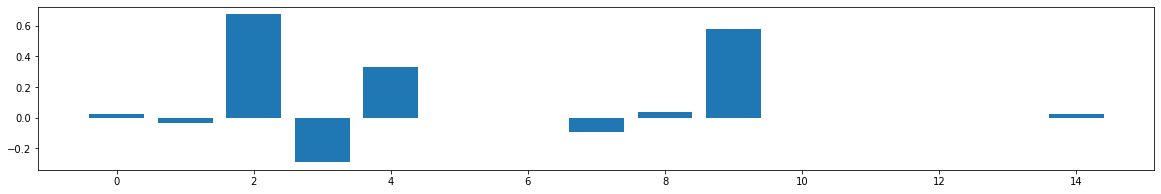

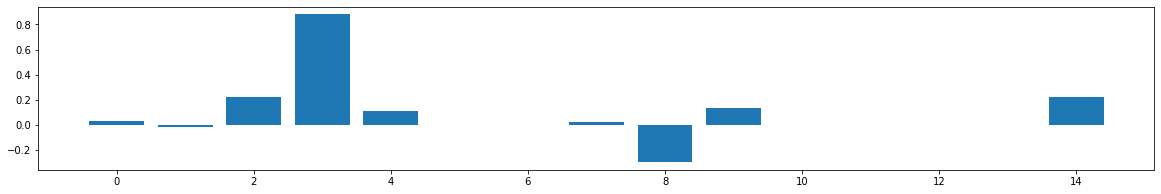

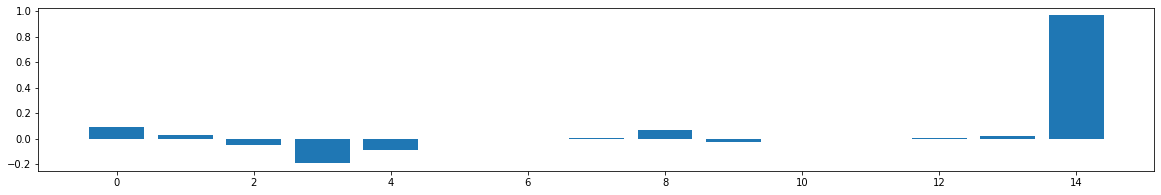

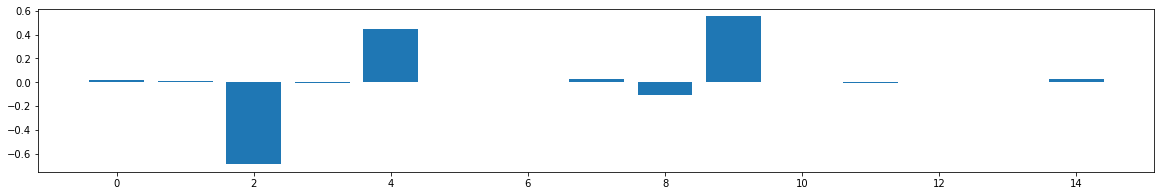

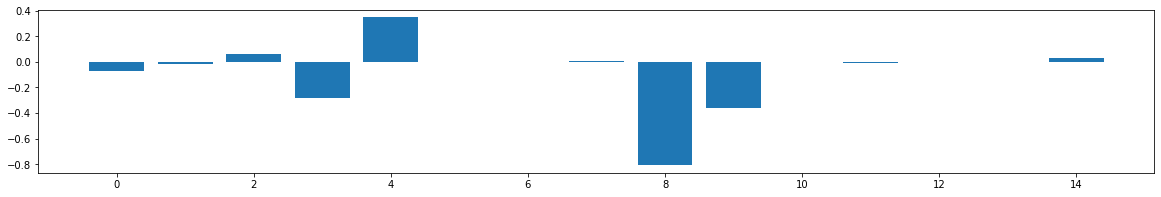

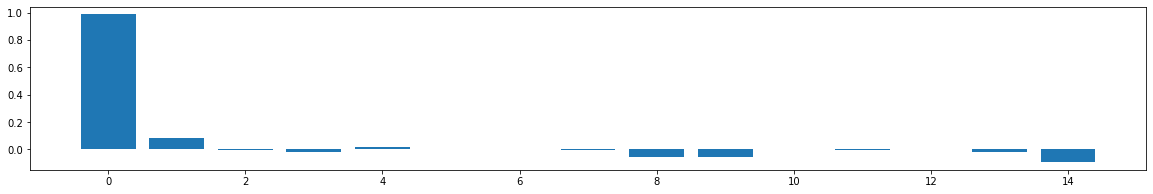

In [ ]:
n_components = 10
pca = PCA(n_components = n_components)
pca.fit(X_train)
print(pca.components_.shape)
print(pca.components_.shape)
for i in range(0,10):
  plt.figure(figsize=(20, 3))
  plt.bar(range(15),pca.components_[i])
  plt.show()

In [ ]:
y = y_train.ravel()
y_v = y_val.ravel()
y_t = y_test.ravel()
print(y.shape,y_v.shape)

(1116,) (372,)


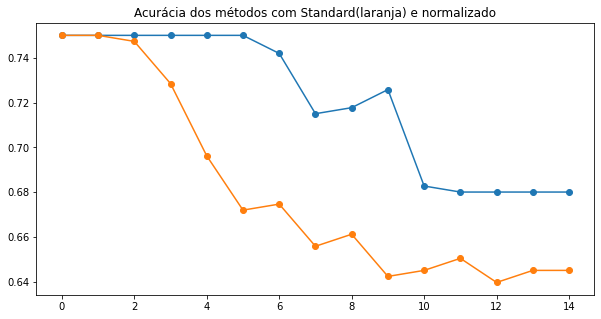

In [ ]:
acc=[]
accstd=[]
accnor=[]
for i in range(1,16):
  pca = PCA(n_components=i)
  X_train_pca = pca.fit_transform(X_train)
  X_val_pca = pca.transform(X_val)

  clf = GaussianNB()
  clf.fit(X_train_pca, y)
  pred_test = clf.predict(X_val_pca)
  acc.append(clf.score(X_val_pca, y_v))

  X_train_pca_std = pca.fit_transform(X_train_std)
  X_val_pca_std= pca.transform(X_val_std)
  clf.fit(X_train_pca_std,y)
  pred_test = clf.predict(X_val_pca_std)
  accstd.append(clf.score(X_val_pca_std, y_v))

  X_train_pca_nor = pca.fit_transform(X_train_nor)
  X_val_pca_nor = pca.transform(X_val_nor)
  clf.fit(X_train_pca_nor,y)
  pred_test = clf.predict(X_val_pca_nor)
  accnor.append(clf.score(X_val_pca_nor,y_v))
plt.figure(figsize=(22,5))
plt.subplot(1,2,1)
plt.title("Acurácia dos métodos com Standard(laranja) e normalizado")
plt.plot(acc,'-o')
plt.plot(accstd,'-o')
plt.show()

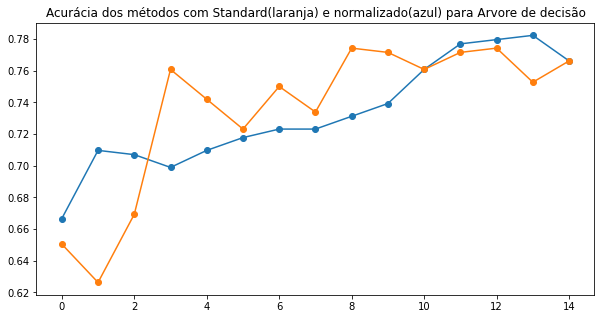

In [ ]:
acc=[]
accstd =[]
accnor = []
for i in range(1,16):
  pca = PCA(n_components=i)
  X_train_pca = pca.fit_transform(X_train)
  X_val_pca = pca.transform(X_val)

  clf = DecisionTreeClassifier()
  clf.fit(X_train_pca, y)
  pred_test = clf.predict(X_val_pca)
  acc.append(clf.score(X_val_pca, y_v))

  X_train_pca_std = pca.fit_transform(X_train_std)
  X_val_pca_std= pca.transform(X_val_std)
  clf.fit(X_train_pca_std,y)
  pred_test = clf.predict(X_val_pca_std)
  accstd.append(clf.score(X_val_pca_std, y_v))

  X_train_pca_nor = pca.fit_transform(X_train_nor)
  X_val_pca_nor = pca.transform(X_val_nor)
  clf.fit(X_train_pca_nor,y)
  pred_test = clf.predict(X_val_pca_nor)
  accnor.append(clf.score(X_val_pca_nor,y_v))
  
plt.figure(figsize=(22,5))
plt.subplot(1,2,1)
plt.title("Acurácia dos métodos com Standard(laranja) e normalizado(azul) para Arvore de decisão")
plt.plot(acc,'-o')
plt.plot(accstd,'-o')
plt.show()

[[ 49  55]
 [ 33 236]]
              precision    recall  f1-score   support

           0       0.60      0.47      0.53       104
           1       0.81      0.88      0.84       269

    accuracy                           0.76       373
   macro avg       0.70      0.67      0.68       373
weighted avg       0.75      0.76      0.75       373

Acurácia: 0.7640750670241286
Matriz de confusão, não normalizada
[[ 51  53]
 [ 34 235]]
Matriz normalizada
[[0.49038462 0.50961538]
 [0.12639405 0.87360595]]


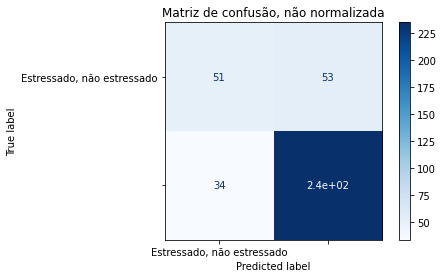

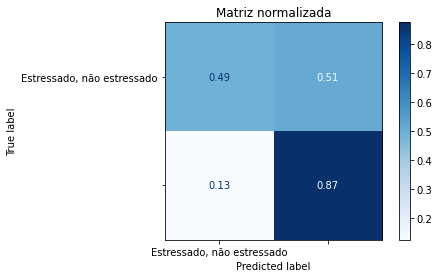

In [ ]:
#teste
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier()
clf.fit(X_train_pca, y)
pred_test = clf.predict(X_test_pca)
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))
print("Acurácia:", accuracy_score(y_test,pred_test))
class_names = ['Estressado, não estressado']
clf = DecisionTreeClassifier().fit(X_train_pca,y)
titles_options = [("Matriz de confusão, não normalizada", None),
                  ("Matriz normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test_pca, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

[[  0  93]
 [  0 279]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        93
           1       0.75      1.00      0.86       279

    accuracy                           0.75       372
   macro avg       0.38      0.50      0.43       372
weighted avg       0.56      0.75      0.64       372

Acurácia: 0.75
Matriz de confusão, não normalizada
[[ 65  28]
 [167 112]]
Matriz normalizada
[[0.69892473 0.30107527]
 [0.59856631 0.40143369]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


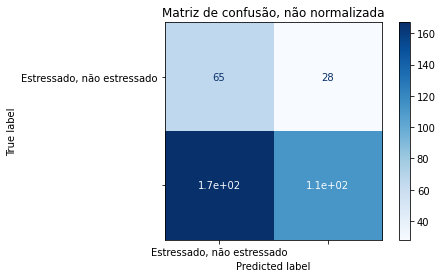

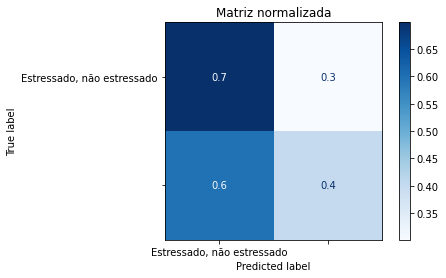

In [ ]:
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_val_std)

clf = GaussianNB()
clf.fit(X_train_pca, y)
pred_test = clf.predict(X_test_pca)
print(confusion_matrix(y_val,pred_test))
print(classification_report(y_val,pred_test))
print("Acurácia:", accuracy_score(y_val,pred_test))
class_names = ['Estressado, não estressado']
clf = DecisionTreeClassifier().fit(X_train_pca,y)
titles_options = [("Matriz de confusão, não normalizada", None),
                  ("Matriz normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test_pca, y_val,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

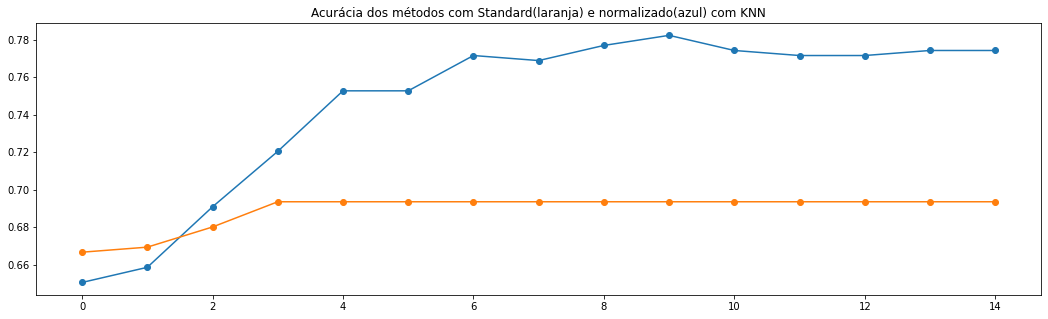

In [ ]:
score=[]
score2=[]
k=1
for i in range(1,16):
    pca = PCA(n_components = i)
    x_train_std_pca = pca.fit_transform(X_train_std)
    x_test_std_pca = pca.transform(X_val_std)

    clf = KNeighborsClassifier(n_neighbors=k) 
    clf.fit(x_train_std_pca, y)
    score.append(clf.score(x_test_std_pca, y_val))

    x_train_std_pca = pca.fit_transform(X_train)
    x_test_std_pca = pca.transform(X_val)
    clf = KNeighborsClassifier(n_neighbors=k) 
    clf.fit(x_train_std_pca, y)
    score2.append(clf.score(x_test_std_pca, y_val))

plt.figure(figsize=(18, 5))
plt.title("Acurácia dos métodos com Standard(laranja) e normalizado(azul) com KNN")
plt.plot(score,'-o')
plt.plot(score2,'-o')
plt.show()

In [ ]:
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(X_train,y)
pred_test = clf.predict(X_test)
print("Acurácia:", accuracy_score(y_test,pred_test))
print(classification_report(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))


Acurácia: 0.6219839142091153
              precision    recall  f1-score   support

           0       0.37      0.50      0.42       104
           1       0.78      0.67      0.72       269

    accuracy                           0.62       373
   macro avg       0.57      0.58      0.57       373
weighted avg       0.66      0.62      0.64       373

[[ 52  52]
 [ 89 180]]


In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y)
pred_test = clf.predict(X_test)
print("Acurácia:", accuracy_score(y_test,pred_test))
print(classification_report(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))


Acurácia: 0.7560321715817694
              precision    recall  f1-score   support

           0       0.58      0.44      0.50       104
           1       0.80      0.88      0.84       269

    accuracy                           0.76       373
   macro avg       0.69      0.66      0.67       373
weighted avg       0.74      0.76      0.74       373

[[ 46  58]
 [ 33 236]]


In [ ]:
clf= RandomForestClassifier(n_estimators=30,random_state=0)
clf.fit(X_train,y)
pred_test = clf.predict(X_test)
print("Acurácia:", accuracy_score(y_test,pred_test))
print(classification_report(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))

Acurácia: 0.8230563002680965
              precision    recall  f1-score   support

           0       0.83      0.46      0.59       104
           1       0.82      0.96      0.89       269

    accuracy                           0.82       373
   macro avg       0.82      0.71      0.74       373
weighted avg       0.82      0.82      0.80       373

[[ 48  56]
 [ 10 259]]


In [ ]:
clf = GaussianNB()
clf.fit(X_train,y)
pred_test = clf.predict(X_test)
print("Acurácia:", accuracy_score(y_test,pred_test))
print(classification_report(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))

Acurácia: 0.7050938337801609
              precision    recall  f1-score   support

           0       0.47      0.45      0.46       104
           1       0.79      0.80      0.80       269

    accuracy                           0.71       373
   macro avg       0.63      0.63      0.63       373
weighted avg       0.70      0.71      0.70       373

[[ 47  57]
 [ 53 216]]


[[ 32  72]
 [ 62 207]]
              precision    recall  f1-score   support

           0       0.34      0.31      0.32       104
           1       0.74      0.77      0.76       269

    accuracy                           0.64       373
   macro avg       0.54      0.54      0.54       373
weighted avg       0.63      0.64      0.63       373

Acurácia: 0.6407506702412868
Matriz de confusão, não normalizada
[[ 32  72]
 [ 62 207]]
Matriz normalizada
[[0.30769231 0.69230769]
 [0.23048327 0.76951673]]


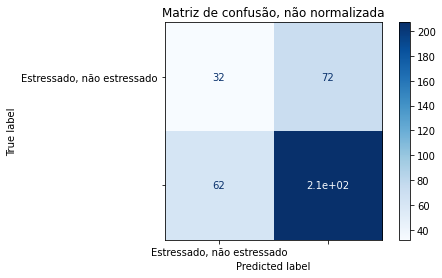

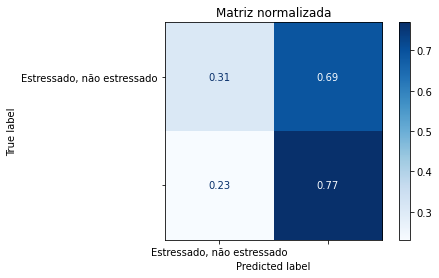

In [ ]:
pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train_pca, y)
pred_test = clf.predict(X_test_pca)
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))
print("Acurácia:", accuracy_score(y_test,pred_test))
class_names = ['Estressado, não estressado']
clf = KNeighborsClassifier(n_neighbors=1).fit(X_train_pca,y)
titles_options = [("Matriz de confusão, não normalizada", None),
                  ("Matriz normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test_pca, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

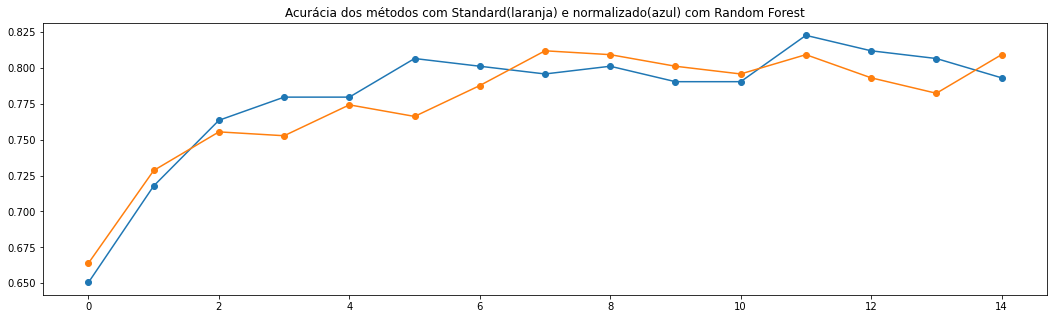

In [ ]:
score=[]
score2=[]
k=30
for i in range(1,16):
    pca = PCA(n_components = i)
    x_train_std_pca = pca.fit_transform(X_train_std)
    x_test_std_pca = pca.transform(X_val_std)

    clf = RandomForestClassifier(n_estimators= k, random_state=0)
    clf.fit(x_train_std_pca, y)
    score.append(clf.score(x_test_std_pca, y_val))

    x_train_std_pca = pca.fit_transform(X_train)
    x_test_std_pca = pca.transform(X_val)
    clf = RandomForestClassifier(n_estimators= k, random_state=0)
    clf.fit(x_train_std_pca, y)
    score2.append(clf.score(x_test_std_pca, y_val))

plt.figure(figsize=(18, 5))
plt.title("Acurácia dos métodos com Standard(laranja) e normalizado(azul) com Random Forest")
plt.plot(score,'-o')
plt.plot(score2,'-o')
plt.show()

[[ 56  48]
 [ 17 252]]
              precision    recall  f1-score   support

           0       0.77      0.54      0.63       104
           1       0.84      0.94      0.89       269

    accuracy                           0.83       373
   macro avg       0.80      0.74      0.76       373
weighted avg       0.82      0.83      0.82       373

Acurácia: 0.8257372654155496
Matriz de confusão, não normalizada
[[ 56  48]
 [ 17 252]]
Matriz normalizada
[[0.53846154 0.46153846]
 [0.06319703 0.93680297]]


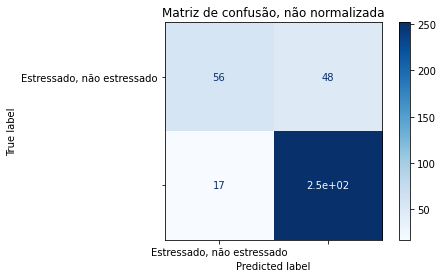

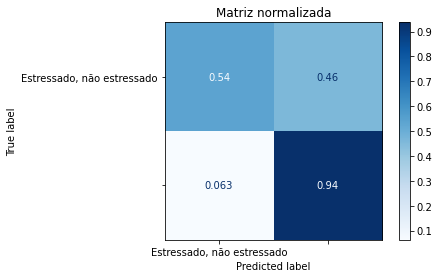

In [ ]:
pca = PCA(n_components=12)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
k=30
clf = RandomForestClassifier(n_estimators= k, random_state=0)
clf.fit(X_train_pca, y)
pred_test = clf.predict(X_test_pca)
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))
print("Acurácia:", accuracy_score(y_test,pred_test))
class_names = ['Estressado, não estressado']
clf = RandomForestClassifier(n_estimators= k, random_state=0).fit(X_train_pca,y)
titles_options = [("Matriz de confusão, não normalizada", None),
                  ("Matriz normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test_pca, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

#Resultados com Validação Cruzada.


In [ ]:
clf = RandomForestClassifier(n_estimators= 30, random_state=0)
scores = cross_val_score(clf, X, Y, cv=5, scoring='accuracy')
f = cross_val_score(clf, X, Y, cv=5, scoring='f1')
rec = cross_val_score(clf, X, Y, cv=5, scoring='recall')
prec = cross_val_score(clf, X, Y, cv=5, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.5318458300902302
0.6489032956218657
0.626286222674123
0.6895230096550724


In [ ]:
pca = PCA(n_components=12)
X_train_pca = pca.fit_transform(X)
scores = cross_val_score(clf, X_train_pca, Y, cv=5, scoring='accuracy')
f = cross_val_score(clf, X_train_pca, Y, cv=5, scoring='f1')
rec = cross_val_score(clf, X_train_pca, Y, cv=5, scoring='recall')
prec = cross_val_score(clf, X_train_pca, Y, cv=5, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.5845224711003488
0.6968716468257752
0.6718479918657854
0.7363917616155645


In [ ]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, Y, cv=5, scoring='accuracy')
f = cross_val_score(clf, X, Y, cv=5, scoring='f1')
rec = cross_val_score(clf, X, Y, cv=5, scoring='recall')
prec = cross_val_score(clf, X, Y, cv=5, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.5254259275274583
0.6448912051623055
0.5870691408235892
0.7074547741823952


In [ ]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X)
scores = cross_val_score(clf, X_train_pca, Y, cv=5, scoring='accuracy')
f = cross_val_score(clf, X_train_pca, Y, cv=5, scoring='f1')
rec = cross_val_score(clf, X_train_pca, Y, cv=5, scoring='recall')
prec = cross_val_score(clf, X_train_pca, Y, cv=5, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.5453198420248494
0.6541255592251386
0.5949034062023386
0.7202155809021089


In [ ]:
clf = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(clf, X, Y, cv=5, scoring='accuracy')
f = cross_val_score(clf, X, Y, cv=5, scoring='f1')
rec = cross_val_score(clf, X, Y, cv=5, scoring='recall')
prec = cross_val_score(clf, X, Y, cv=5, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.5324886851739745
0.6712521608052293
0.6332104728012202
0.7143717946181495


In [ ]:
pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(X)
scores = cross_val_score(clf, X_train_pca, Y, cv=5, scoring='accuracy')
f = cross_val_score(clf, X_train_pca, Y, cv=5, scoring='f1')
rec = cross_val_score(clf, X_train_pca, Y, cv=5, scoring='recall')
prec = cross_val_score(clf, X_train_pca, Y, cv=5, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.5319539335235953
0.6710021300201247
0.6332053889171327
0.713897631460967


In [ ]:
clf = GaussianNB()
scores = cross_val_score(clf, X, Y, cv=5, scoring='accuracy')
f = cross_val_score(clf, X, Y, cv=5, scoring='f1')
rec = cross_val_score(clf, X, Y, cv=5, scoring='recall')
prec = cross_val_score(clf, X, Y, cv=5, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.6512078756954655
0.6875523626933898
0.799288256227758
0.6032265407390849


In [ ]:
pca = PCA(n_components=11)
X_train_pca = pca.fit_transform(X)
scores = cross_val_score(clf, X_train_pca, Y, cv=5, scoring='accuracy')
f = cross_val_score(clf, X_train_pca, Y, cv=5, scoring='f1')
rec = cross_val_score(clf, X_train_pca, Y, cv=5, scoring='recall')
prec = cross_val_score(clf, X_train_pca, Y, cv=5, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.6512078756954655
0.6875523626933898
0.799288256227758
0.6032265407390849


Validação cruzada com todas as possibilidades possiveis 


In [ ]:
Xc, Xv, Yc, yv = train_test_split(X, Y, test_size=0.2,random_state=30)

In [ ]:
clf = GaussianNB()
scores = cross_val_score(clf, Xc, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, Xc, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, Xc, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, Xc, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.739247311827957
0.8433469618401809
0.941696113074205
0.7702212495503058


In [ ]:
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(Xc)
scores = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.7580645161290323
0.8614116323351221
0.9911660777385158
0.7618911633007401


In [ ]:
clf = RandomForestClassifier(n_estimators=30)
scores = cross_val_score(clf, Xc, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, Xc, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, Xc, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, Xc, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.8234767025089605
0.8902158661841102
0.9392523364485981
0.8507562512224464


In [ ]:
pca = PCA(n_components=13)
X_train_pca = pca.fit_transform(Xc)
scores = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.8207885304659498
0.8857949665956141
0.9252336448598131
0.8461552558356673


In [ ]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, Xc, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, Xc, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, Xc, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, Xc, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.7643369175627239
0.840777101000709
0.8352803738317758
0.8385217323160679


In [ ]:
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(Xc)
scores = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.7589605734767026
0.8253838155142443
0.8142523364485981
0.8412376735573952


In [ ]:
clf = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(clf, Xc, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, Xc, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, Xc, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, Xc, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.6908602150537635
0.79887985828496
0.8014018691588785
0.7968320627126675


In [ ]:
pca = PCA(n_components=14)
X_train_pca = pca.fit_transform(Xc)
scores = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.6908602150537635
0.79887985828496
0.8014018691588785
0.7968320627126675


Validação cruzada com 1,2,3 e 5 partes e 4 para validação.

In [ ]:
Xc, Xf, Yc, yf = train_test_split(X, Y, test_size=0.4,random_state=30)
Xk, Xv, Yk, yv =train_test_split(Xf,yf,test_size=0.5,random_state=30)

In [ ]:
Xc = pd.concat([Xc,Xv],ignore_index=True,sort=False)
Xc

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate,ECG,HR
0,83.375839,719.632939,204.139137,180.216236,275.037712,0.641975,0.641975,243.902439,193.065584,208.639713,126546.958887,0.925354,0.385617,-0.001488,68.013720
1,52.857143,1135.135135,108.108108,127.406627,156.040613,0.333333,0.333333,0.000000,90.090090,90.090090,25497.870738,1.000000,0.176211,0.000263,76.514607
2,52.857143,1135.135135,253.535987,250.547246,393.983236,0.625000,0.625000,0.000000,177.163657,232.838661,129592.420709,0.760886,0.282028,-0.001262,85.765237
3,83.592233,717.770035,201.488952,183.094729,318.434737,0.750000,0.750000,243.902439,225.133243,172.242217,121822.948133,1.307074,0.278918,-0.000256,71.745419
4,59.012658,1016.731017,115.112895,133.749097,204.305121,0.571429,0.571429,0.000000,133.749097,94.574894,39738.968753,1.414214,0.281083,0.038735,108.519274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,85.376471,702.769740,208.630887,190.814687,320.874885,0.721154,0.721154,243.902439,226.674536,186.411463,132747.155227,1.215990,0.350064,0.000076,78.285714
1485,51.896104,1156.156156,235.022160,225.133278,382.219882,0.714286,0.714286,0.000000,270.270270,168.297257,142897.682341,1.605910,0.096140,-0.007767,87.428894
1486,90.517241,662.857143,160.509393,116.018135,178.226558,0.617647,0.617647,0.000000,117.426263,194.962511,71922.739887,0.602302,0.237069,0.001793,71.226891
1487,48.338710,1241.241241,132.797789,112.860088,237.929958,0.775000,0.775000,0.000000,166.537264,84.256513,44082.354194,1.976551,0.343212,-0.013884,100.206349


In [ ]:
Yc = Yc.append(yv)

In [ ]:
clf = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(clf, Xc, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, Xc, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, Xc, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, Xc, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.6769563117991293
0.7852748877139121
0.7821956790590849
0.7888182519566493


In [ ]:
pca = PCA(n_components=14)
X_train_pca = pca.fit_transform(Xc)
scores = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.6769563117991293
0.7852748877139121
0.7821956790590849
0.7888182519566493


In [ ]:
clf = RandomForestClassifier(n_estimators=30)
scores = cross_val_score(clf, Xc, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, Xc, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, Xc, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, Xc, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.8294091787021822
0.8904690294588288
0.9386688877110623
0.8478163052054677


In [ ]:
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(Xc)
scores = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.8334378333189195
0.8961737651899078
0.9235664167991722
0.855830824951483


In [ ]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, Xc, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, Xc, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, Xc, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, Xc, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.7481586381850155
0.838961674894411
0.8426875899144393
0.8337105540086542


In [ ]:
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(Xc)
scores = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.7696441955663179
0.8437760716143459
0.850675777996517
0.8389291233164304


In [ ]:
clf = GaussianNB()
scores = cross_val_score(clf, Xc, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, Xc, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, Xc, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, Xc, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.7454596557986681
0.8472311039882534
0.9466192170818506
0.773625053889764


In [ ]:
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(Xc)
scores = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.7414273977341521
0.8411140600506237
0.9288256227758007
0.7823614509899552


Validação cruzada com 1,2,4 e 5 com 3 como validação

In [ ]:
Xc, Xf, Yc, yf = train_test_split(X, Y, test_size=0.2,random_state=30)
Xk, Xv, Yk, yv =train_test_split(Xc,Yc,test_size=0.5,random_state=30)
Xz, Xa, Yz, yz =train_test_split(Xv,yv,test_size=0.5,random_state=30)

In [ ]:
Xc = pd.concat([Xk,Xa,Xf],ignore_index=True,sort=False)
Xc

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate,ECG,HR
0,92.316832,649.935650,132.661056,126.846762,221.623895,0.672414,0.672414,0.000000,155.005101,109.332416,53240.828886,1.417741,0.256692,-0.016234,117.884354
1,70.285714,853.658537,121.951220,105.612854,211.225708,0.750000,0.750000,121.951220,143.000480,85.026425,38198.058629,1.681836,0.495987,-0.001757,66.856374
2,81.330612,737.729600,209.831393,196.255994,331.182332,0.718750,0.718750,243.902439,233.933068,185.371746,136233.849510,1.261967,0.318263,-0.002503,77.531697
3,103.924528,577.342048,161.058036,140.547681,254.519434,0.780822,0.780822,196.078431,179.962396,143.368317,81055.936444,1.255245,0.789372,0.003884,73.623797
4,70.881356,846.484935,121.740048,90.897072,222.651446,0.833333,0.833333,0.000000,131.722372,64.273936,26597.714033,2.049390,0.417275,-0.000249,68.791837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,64.263158,933.660934,134.575567,130.371997,214.789031,0.631579,0.631579,0.000000,150.540615,112.005802,52971.720484,1.344043,0.324728,0.009524,86.714286
1485,62.437500,960.960961,134.298377,117.030460,135.135135,0.250000,0.250000,0.000000,82.753032,82.753032,21513.828435,1.000000,0.231348,-0.007669,97.478458
1486,88.000000,681.818182,195.118802,156.141950,248.863675,0.671233,0.671233,243.902439,174.380065,199.910128,109516.991249,0.872292,0.300320,-0.004129,71.905930
1487,64.347826,932.432432,134.457762,134.298377,201.447566,0.555556,0.555556,0.000000,140.853326,120.120120,53153.606556,1.172604,0.321906,-0.002606,75.565611


In [ ]:
Yc = Yk.append(yz)
Yc = Yc.append(yf)

In [ ]:
Yc

1319    1
1725    0
529     1
82      1
556     0
       ..
146     1
1278    1
544     1
218     1
1855    0
Name: stress, Length: 1489, dtype: int64

In [ ]:
clf = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(clf, Xc, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, Xc, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, Xc, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, Xc, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.6809957767592032
0.7866214873214218
0.7807638535841384
0.7927881166537909


In [ ]:
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(Xc)
scores = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.6823380610568192
0.7879477618574836
0.7834297153024912
0.7926371669053192


In [ ]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, Xc, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, Xc, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, Xc, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, Xc, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.772321557265992
0.8448190804194089
0.8350724453482461
0.8447301730219391


In [ ]:
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(Xc)
scores = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.7770348669607081
0.8476953787318333
0.8556335790543975
0.8463384905517864


In [ ]:
clf = RandomForestClassifier(n_estimators=30)
scores = cross_val_score(clf, Xc, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, Xc, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, Xc, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, Xc, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.8334378333189196
0.88951876135786
0.9242596593797661
0.8524185707974486


In [ ]:
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(Xc)
scores = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.8112820346507538
0.884886013862359
0.9197985510930351
0.857769327663724


In [ ]:
clf = GaussianNB()
scores = cross_val_score(clf, Xc, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, Xc, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, Xc, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, Xc, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.3634095102193779
0.20092592592592592
0.19375
0.20865384615384616


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(Xc)
scores = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.35467295107959296
0.19155206286836934
0.17410714285714285
0.212882096069869


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validação com 1,3,4 e 5 com 2 como validação


In [ ]:
Xc, Xf, Yc, yf = train_test_split(X, Y, test_size=0.6,random_state=30)
Xk, Xv, Yk, yv =train_test_split(Xc,Yc,test_size=0.5,random_state=30)

In [ ]:
Xc = pd.concat([Xf,Xk],ignore_index=True,sort=False)
Xc

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate,ECG,HR
0,92.913295,645.763345,173.562194,1.324158e+02,220.974803,0.707865,0.707865,212.765957,154.930449,1.774549e+02,8.637232e+04,8.730696e-01,0.095129,-0.005120,69.395062
1,75.000000,800.000000,151.185789,1.197330e+02,240.000000,0.840000,0.840000,200.000000,169.705627,8.836289e+01,4.711032e+04,1.920553e+00,0.327381,0.002151,71.729412
2,58.421053,1027.027027,162.162162,5.684342e-14,270.270270,1.000000,1.000000,0.000000,183.865228,2.273737e-13,1.313378e-10,8.086478e+14,0.422064,-0.001198,84.900901
3,51.896104,1156.156156,235.022160,2.251333e+02,382.219882,0.714286,0.714286,0.000000,270.270270,1.682973e+02,1.428977e+05,1.605910e+00,0.096140,-0.007767,87.428894
4,90.731707,661.290323,141.825471,1.044324e+02,172.378321,0.657143,0.657143,200.000000,120.813569,1.486813e+02,5.643154e+04,8.125675e-01,0.073171,0.001145,64.880672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,81.088889,739.928748,195.017231,1.982251e+02,322.029115,0.689189,0.689189,243.902439,227.601603,1.564288e+02,1.118516e+05,1.454985e+00,0.440790,0.007000,81.332653
1485,59.769231,1003.861004,122.095663,1.007238e+02,246.721873,0.833333,0.833333,0.000000,171.526421,7.122247e+01,3.837938e+04,2.408319e+00,0.213523,-0.007528,94.135440
1486,80.492647,745.409701,184.122522,1.774891e+02,288.306742,0.698630,0.698630,243.902439,203.863653,1.672234e+02,1.070993e+05,1.219109e+00,0.331930,-0.000494,73.104082
1487,79.975309,750.231553,198.914031,1.779001e+02,303.153346,0.737179,0.737179,243.902439,214.358935,1.822340e+02,1.227215e+05,1.176284e+00,0.295543,-0.002638,67.656442


In [ ]:
Yc = yf.append(Yk)
Yc

1642    0
1434    1
1217    1
1172    1
1435    1
       ..
467     1
1209    1
695     1
745     1
1818    0
Name: stress, Length: 1489, dtype: int64

In [ ]:
clf = GaussianNB()
scores = cross_val_score(clf, Xc, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, Xc, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, Xc, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, Xc, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.6238252760240999
0.6425284837861525
0.7491071428571429
0.5625


In [ ]:
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(Xc)
scores = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.6238252760240999
0.6425284837861525
0.7491071428571429
0.5625


In [ ]:
clf = RandomForestClassifier(n_estimators=30)
scores = cross_val_score(clf, Xc, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, Xc, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, Xc, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, Xc, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.8206672143907291
0.8847679471240857
0.9274801587301588
0.8548438971906218


In [ ]:
pca = PCA(n_components=14)
X_train_pca = pca.fit_transform(Xc)
scores = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.829403773530514
0.8854687913075243
0.9247983870967742
0.8551893727264082


In [ ]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, Xc, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, Xc, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, Xc, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, Xc, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.7642408256219551
0.8427279037422548
0.8424187147977471
0.845797752971666


In [ ]:
pca = PCA(n_components=14)
X_train_pca = pca.fit_transform(Xc)
scores = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.7535241719277004
0.8334719906428092
0.8424283154121864
0.8314239309597509


In [ ]:
clf = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(clf, Xc, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, Xc, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, Xc, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, Xc, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.6668702614661709
0.7780567517001624
0.7788434459805427
0.777354756855022


In [ ]:
pca = PCA(n_components=14)
X_train_pca = pca.fit_transform(Xc)
scores = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.6668702614661709
0.7780567517001624
0.7788434459805427
0.777354756855022


Validação com 2,3,4,5 e 1 para teste


In [ ]:
Xc, Xf, Yc, yf = train_test_split(X, Y, test_size=0.8,random_state=30)

In [ ]:
Xc = Xf
Xc

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate,ECG,HR
1642,92.913295,645.763345,173.562194,1.324158e+02,220.974803,0.707865,0.707865,212.765957,154.930449,1.774549e+02,8.637232e+04,8.730696e-01,0.095129,-0.005120,69.395062
1434,75.000000,800.000000,151.185789,1.197330e+02,240.000000,0.840000,0.840000,200.000000,169.705627,8.836289e+01,4.711032e+04,1.920553e+00,0.327381,0.002151,71.729412
1217,58.421053,1027.027027,162.162162,5.684342e-14,270.270270,1.000000,1.000000,0.000000,183.865228,2.273737e-13,1.313378e-10,8.086478e+14,0.422064,-0.001198,84.900901
1172,51.896104,1156.156156,235.022160,2.251333e+02,382.219882,0.714286,0.714286,0.000000,270.270270,1.682973e+02,1.428977e+05,1.605910e+00,0.096140,-0.007767,87.428894
1435,90.731707,661.290323,141.825471,1.044324e+02,172.378321,0.657143,0.657143,200.000000,120.813569,1.486813e+02,5.643154e+04,8.125675e-01,0.073171,0.001145,64.880672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,68.307692,878.378378,151.085674,1.274066e+02,220.674752,0.666667,0.666667,0.000000,90.090090,1.560406e+02,4.416361e+04,5.773503e-01,0.071210,-0.004056,77.173423
1339,84.206897,712.530713,130.012349,1.350548e+02,194.377014,0.517241,0.517241,0.000000,129.472917,9.549814e+01,3.884398e+04,1.355764e+00,0.478927,-0.044170,112.149321
1371,67.682927,886.486486,121.351050,1.081081e+02,120.868539,0.200000,0.200000,0.000000,85.466964,7.644398e+01,2.052539e+04,1.118034e+00,0.496681,-0.014869,121.608597
464,82.000000,731.707317,209.364653,1.839271e+02,302.132295,0.706897,0.706897,243.902439,213.453472,2.051740e+02,1.375863e+05,1.040354e+00,0.287998,-0.007213,72.408998


In [ ]:
Yc=yf
Yc

1642    0
1434    1
1217    1
1172    1
1435    1
       ..
1075    1
1339    1
1371    1
464     1
1572    1
Name: stress, Length: 1489, dtype: int64

In [ ]:
clf = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(clf, Xc, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, Xc, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, Xc, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, Xc, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.664859537605581
0.7788914032978812
0.7890300662695651
0.7690178512237308


In [ ]:
pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(Xc)
scores = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.6594904004151172
0.7751328629674563
0.7845401098476057
0.7659585968011903


In [ ]:
clf = RandomForestClassifier(n_estimators=30)
scores = cross_val_score(clf, Xc, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, Xc, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, Xc, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, Xc, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.8152980772002651
0.8855116384585798
0.9299560351718625
0.8532182841972845


In [ ]:
pca = PCA(n_components=14)
X_train_pca = pca.fit_transform(Xc)
scores = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.816652973565107
0.8869794911984933
0.917401562620871
0.8472593494685648


In [ ]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, Xc, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, Xc, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, Xc, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, Xc, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.759574360748364
0.8387117883964165
0.8402149248343261
0.8387630367713748


In [ ]:
pca = PCA(n_components=11)
X_train_pca = pca.fit_transform(Xc)
scores = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.7521854910778634
0.8315827429868445
0.8249078156829375
0.8447942722239398


In [ ]:
clf = GaussianNB()
scores = cross_val_score(clf, Xc, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, Xc, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, Xc, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, Xc, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.6231550347372365
0.6416495332624365
0.7491039426523297
0.5611559139784946


In [ ]:
pca = PCA(n_components=12)
X_train_pca = pca.fit_transform(Xc)
scores = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='accuracy')
f = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='f1')
rec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='recall')
prec = cross_val_score(clf, X_train_pca, Yc, cv=4, scoring='precision')
print(scores.mean())
print(f.mean())
print(rec.mean())
print(prec.mean())

0.6231550347372365
0.6416495332624365
0.7491039426523297
0.5611559139784946
